# Validation

Calculations related to hand validation of our results.

## Read data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from   scipy.stats import permutation_test
import statsmodels.api as sm
import statsmodels.formula.api as smf

gsheet = 'https://docs.google.com/spreadsheets/d/1i89xEmIAaPQa2DKAxvoVlLNAlst2R7EwC0v0pqVpdF0/export?format=csv'
df = pd.read_csv(gsheet, index_col='book_id')

ids_to_drop = [
    '2010_Haldeman,Joe_Starbound_SF', # sci-fi
]

manual_cols = ['dist_miles', 'manual_distance_gpe_sequences', 'manual_distance_yourLocations', 'manual_mobility_rating']
df.drop(index=ids_to_drop, inplace=True)
df.dropna(subset=manual_cols, inplace=True)

## Correlations

In [2]:
# pearson correlation between hand distance and algorithm distance
results = smf.ols('manual_distance_yourLocations ~ dist_miles', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     manual_distance_yourLocations   R-squared:                       0.525
Model:                                       OLS   Adj. R-squared:                  0.507
Method:                            Least Squares   F-statistic:                     29.84
Date:                           Thu, 16 Nov 2023   Prob (F-statistic):           8.82e-06
Time:                                   17:27:05   Log-Likelihood:                -320.29
No. Observations:                             29   AIC:                             644.6
Df Residuals:                                 27   BIC:                             647.3
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1071.4337   3906.462      0.274      0.786   -6943.965    9086.832
dist_miles     1.2452      0.228      5.462      0.000       0.777       1.713
==============================================================================
Omnibus:                       31.833   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.745
Skew:                           2.228   Prob(JB):                     1.08e-18
Kurtosis:                       9.973   Cond. No.                     2.30e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [3]:
# spearman correlation between hand distance and algorithm distance
results = smf.ols('manual_distance_yourLocations ~ dist_miles', data=df.rank()).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     manual_distance_yourLocations   R-squared:                       0.341
Model:                                       OLS   Adj. R-squared:                  0.316
Method:                            Least Squares   F-statistic:                     13.96
Date:                           Thu, 16 Nov 2023   Prob (F-statistic):           0.000885
Time:                                   17:27:05   Log-Likelihood:                -96.705
No. Observations:                             29   AIC:                             197.4
Df Residuals:                                 27   BIC:                             200.1
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2438      2.683      2.327      0.028       0.738      11.750
dist_miles     0.5837      0.156      3.736      0.001       0.263       0.904
==============================================================================
Omnibus:                        5.219   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                1.764
Skew:                          -0.033   Prob(JB):                        0.414
Kurtosis:                       1.794   Cond. No.                         35.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

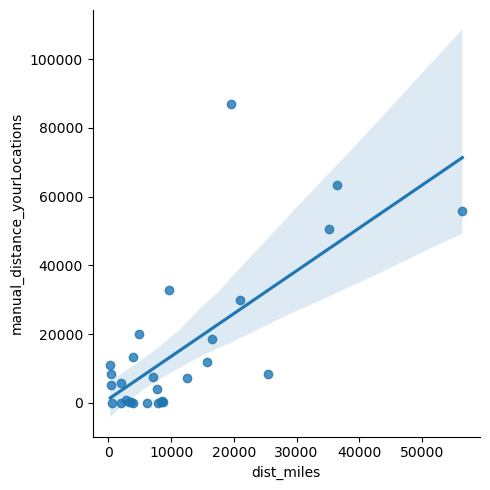

In [4]:
# plot
sns.lmplot(x='dist_miles', y='manual_distance_yourLocations', data=df)
plt.tight_layout()
plt.show()

## Group stats

In [5]:
df.groupby('manual_mobility_rating')[manual_cols].describe().T

manual_mobility_rating                          1             2             3  \
dist_miles                    count      4.000000      9.000000      3.000000   
                              mean    4023.012252   5410.940016  10423.624866   
                              std     3258.418006   3891.640270   4595.181616   
                              min      504.124849    350.917922   7703.657535   
                              25%     2604.598045   2804.565522   7770.879414   
                              50%     3606.438780   3847.740403   7838.101292   
                              75%     5024.852987   8567.934735  11783.608531   
                              max     8375.046600  12489.699570  15729.115770   
manual_distance_yourLocations count      4.000000      9.000000      3.000000   
                              mean    3438.325000   1572.195556   5276.883333   
                              std     6653.333680   2692.135324   5986.345811   
                              min        0.000000      0.000000     19.200000   
                              25%       92.520000     30.000000   2019.275000   
                              50%      167.915000    376.490000   4019.350000   
                              75%     3513.720000    764.600000   7905.725000   
                              max    13417.470000   7267.380000  11792.100000   
manual_mobility_rating        count      4.000000      9.000000      3.000000   
                              mean       1.000000      2.000000      3.000000   
                              std        0.000000      0.000000      0.000000   
                              min        1.000000      2.000000      3.000000   
                              25%        1.000000      2.000000      3.000000   
                              50%        1.000000      2.000000      3.000000   
                              75%        1.000000      2.000000      3.000000   
                              max        1.000000      2.000000      3.000000   

manual_mobility_rating                          4             5  
dist_miles                    count      4.000000      9.000000  
                              mean   11072.105876  21160.008747  
                              std    12000.510572  18419.424294  
                              min      358.932131    287.246003  
                              25%     1582.719388   7089.798078  
                              50%     9275.548327  19525.294400  
                              75%    18764.934815  35206.585120  
                              max    25378.394720  56459.330070  
manual_distance_yourLocations count      4.000000      9.000000  
                              mean   10230.095000  39813.637778  
                              std     5663.914290  26406.121423  
                              min     5642.770000   7546.830000  
                              25%     7622.222500  19924.850000  
                              50%     8388.770000  32964.790000  
                              75%    10996.642500  55959.570000  
                              max    18500.070000  87048.700000  
manual_mobility_rating        count      4.000000      9.000000  
                              mean       4.000000      5.000000  
                              std        0.000000      0.000000  
                              min        4.000000      5.000000  
                              25%        4.000000      5.000000  
                              50%        4.000000      5.000000  
                              75%        4.000000      5.000000  
                              max        4.000000      5.000000

In [6]:
# significance of difference between high and low mobility volumes
def significance_label(pvalue, levels=[0.05, 0.01, 0.001]):
    if pvalue < levels[2]:
        return '***'
    elif pvalue < levels[1]:
        return '**'
    elif pvalue < levels[0]:
        return '*'
    else: 
        return ''

def diff_mean(x, y, axis):
    return np.mean(x, axis=axis) - np.mean(y, axis=axis)

high_mobility = df.loc[df.manual_mobility_rating >= 4, 'dist_miles'] # rating 4 or 5
low_mobility  = df.loc[df.manual_mobility_rating <= 2, 'dist_miles']  # rating 1 or 2
res = permutation_test(
    [high_mobility, low_mobility],
    statistic=diff_mean
)
print(f'High mobility mean dist_miles: {high_mobility.mean():>7.1f}')
print(f'Low mobility mean dist_miles:  {low_mobility.mean():>7.1f}')
print(f'\nDifference in means p-value: {res.pvalue:0.4f} {significance_label(res.pvalue)}')

High mobility mean dist_miles: 18056.0
Low mobility mean dist_miles:   4983.9

Difference in means p-value: 0.0064 **


## Noise estimation

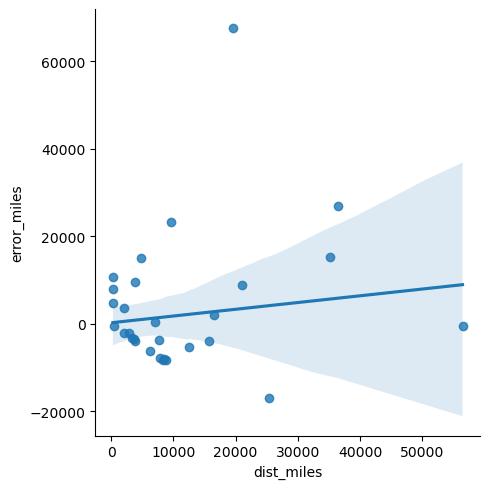

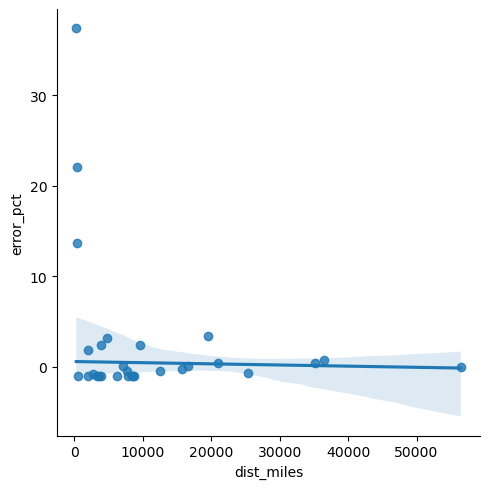

In [7]:
df['error_miles'] = df['manual_distance_yourLocations'] - df['dist_miles']
df['error_pct'] = df['error_miles'].divide(df['dist_miles'])
sns.lmplot(x='dist_miles', y='error_miles', data=df, robust=True);
sns.lmplot(x='dist_miles', y='error_pct', data=df, robust=True);

In [8]:
# pearson correlation between dist_miles and error_miles
results = smf.ols('error_miles ~ dist_miles', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            error_miles   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.157
Date:                Thu, 16 Nov 2023   Prob (F-statistic):              0.292
Time:                        17:27:08   Log-Likelihood:                -320.29
No. Observations:                  29   AIC:                             644.6
Df Residuals:                      27   BIC:                             647.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1071.4337   3906.462      0.274      0.786   -6943.965    9086.832
dist_miles     0.2452      0.228      1.076      0.292      -0.223       0.713
==============================================================================
Omnibus:                       31.833   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.745
Skew:                           2.228   Prob(JB):                     1.08e-18
Kurtosis:                       9.973   Cond. No.                     2.30e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

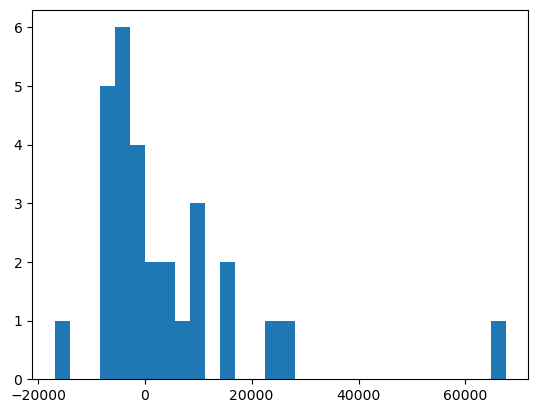

In [9]:
count, bins, _ = plt.hist(df['error_miles'], bins=30)

Could probably use a gamma function to fit this noise, if we made it strictly positive. But it's so sparse that I doubt I'd trust the parameters ...

## Simulate some noisy data

True p-value: 0.0426


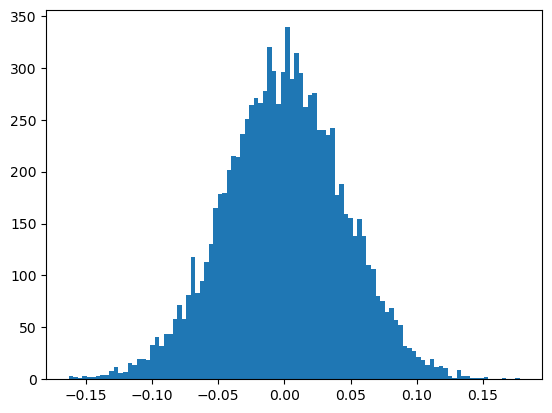

Noisy p-value: 0.0002


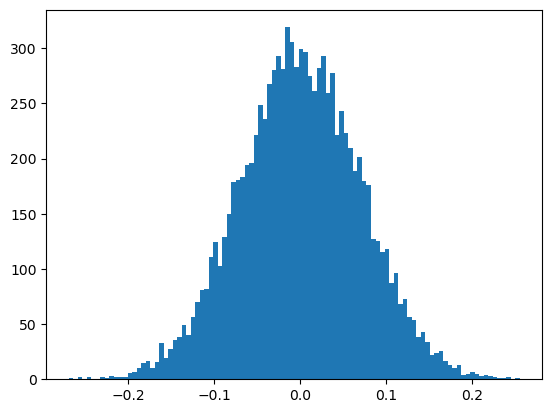

In [10]:
x_true = np.random.normal(loc=1.0, scale=1.0, size=1000)
y_true = np.random.normal(loc=1.1, scale=1.0, size=1000)

result_true = permutation_test((x_true, y_true), statistic=diff_mean)
print('True p-value:', result_true.pvalue)
plt.hist(result_true.null_distribution, bins=100)
plt.show()

x_noisy = x_true + np.random.normal(loc=0.0, scale=1.0, size=1000)
y_noisy = y_true + np.random.default_rng().gamma(shape=1.0, scale=1.0, size=1000)
#y_noisy = y_true + np.random.normal(loc=0.0, scale=1.0, size=1000)

result_noisy = permutation_test((x_noisy, y_noisy), statistic=diff_mean)
print('Noisy p-value:', result_noisy.pvalue)
plt.hist(result_noisy.null_distribution, bins=100)
plt.show()